In [506]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from address_extractor import get_detailed_address

In [507]:
df = pd.read_csv("wasi_bdhousing.csv")
df.head(10)

,amenities,area,balconies,baths,bedroom,location,price,property_type,property_url,purpose
0,NaN,3600 sqft,No balcony,NaN,NaN,"Banasree , Dhaka",468000,Showroom/Shop/Restaurant,https://www.bdhousing.com/details/245564/3600-...,Rent
1,"Security,Lift,Fire exit,Self Water supply,Cyli...",880 sqft,No balcony,NaN,NaN,"Uttara , Dhaka",30000,Showroom/Shop/Restaurant,https://www.bdhousing.com/details/242728/880-s...,Rent
2,"Mosque/Prayer Room,Security,Lift,Fire exit,WAS...",1553 sqft,2,3.0,3.0,"Mirpur 13 , Dhaka",30000,Apartment/Flats,https://www.bdhousing.com/details/245539/1553-...,Rent
3,"Security,Lift,WASA connection,Self Water suppl...",4600 sqft,No balcony,NaN,NaN,"Badda , Dhaka",414000,Office Space,https://www.bdhousing.com/details/241170/9000-...,Rent
4,"Security,Lift,Fire exit,WASA connection,Self W...",1200 sqft,3,3.0,3.0,"Shyamoli , Dhaka",2500,Apartment/Flats,https://www.bdhousing.com/details/244754/1200-...,Rent
5,"Security,Lift,Fire exit,WASA connection,Cylind...",1450 sqft,3,3.0,3.0,"Rayerbazar , Dhaka",2 Mont,Apartment/Flats,https://www.bdhousing.com/details/244726/1450-...,Rent
6,"Security,Lift,Fire exit,WASA connection,Self W...",1200 sqft,3,2.0,3.0,"Dakshin khan , Dhaka",13000,Apartment/Flats,https://www.bdhousing.com/details/245807/1200-...,Rent
7,"Mosque/Prayer Room,Security,Lift,Fire exit,WAS...",1340 sqft,4,3.0,3.0,"Mirpur 12 , Dhaka",25000,Apartment/Flats,https://www.bdhousing.com/details/244724/assur...,Rent
8,"Mosque/Prayer Room,Security,WASA connection,Cy...",1130 sqft,3,3.0,3.0,"Rampura , Dhaka",18000,Apartment/Flats,https://www.bdhousing.com/details/243801/1130-...,Rent
9,"Security,Lift,WASA connection,Gas Connection,E...",900 sqft,2,2.0,2.0,"Mohammadpur , Dhaka",16000,Apartment/Flats,https://www.bdhousing.com/details/245492/900-s...,Rent


In [508]:
df_fin = df.copy()

In [509]:
df_fin.shape

(923, 10)

In [510]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amenities      858 non-null    object 
 1   area           923 non-null    object 
 2   balconies      628 non-null    object 
 3   baths          605 non-null    float64
 4   bedroom        605 non-null    float64
 5   location       923 non-null    object 
 6   price          492 non-null    object 
 7   property_type  923 non-null    object 
 8   property_url   923 non-null    object 
 9   purpose        923 non-null    object 
dtypes: float64(2), object(8)
memory usage: 72.2+ KB


In [511]:
df_fin.shape

(923, 10)

In [512]:
df_fin.head(5)

,amenities,area,balconies,baths,bedroom,location,price,property_type,property_url,purpose
0,NaN,3600 sqft,No balcony,NaN,NaN,"Banasree , Dhaka",468000,Showroom/Shop/Restaurant,https://www.bdhousing.com/details/245564/3600-...,Rent
1,"Security,Lift,Fire exit,Self Water supply,Cyli...",880 sqft,No balcony,NaN,NaN,"Uttara , Dhaka",30000,Showroom/Shop/Restaurant,https://www.bdhousing.com/details/242728/880-s...,Rent
2,"Mosque/Prayer Room,Security,Lift,Fire exit,WAS...",1553 sqft,2,3.0,3.0,"Mirpur 13 , Dhaka",30000,Apartment/Flats,https://www.bdhousing.com/details/245539/1553-...,Rent
3,"Security,Lift,WASA connection,Self Water suppl...",4600 sqft,No balcony,NaN,NaN,"Badda , Dhaka",414000,Office Space,https://www.bdhousing.com/details/241170/9000-...,Rent
4,"Security,Lift,Fire exit,WASA connection,Self W...",1200 sqft,3,3.0,3.0,"Shyamoli , Dhaka",2500,Apartment/Flats,https://www.bdhousing.com/details/244754/1200-...,Rent


In [513]:
# getting unique values
cols = ["area","balconies","baths","bedroom","property_type"]
for col in cols:
    print(f"column name {col}:{df_fin[col].unique()}")

column name area:['3600 sqft' '880 sqft' '1553 sqft' '4600 sqft' '1200 sqft' '1450 sqft'
 '1340 sqft' '1130 sqft' '900 sqft' '2200 sqft' '2000 sqft' '1600 sqft'
 '2310 sqft' '1400 sqft' '1550 sqft' '3200 sqft' '1350 sqft' '2250 sqft'
 '1150 sqft' '700 sqft' '1495 sqft' '2130 sqft' '1750 sqft' '1771 sqft'
 '1175 sqft' '230 sqft' '1610 sqft' '18 sqft' '1100 sqft' '2062 sqft'
 '1250 sqft' '1787 sqft' '1080 sqft' '1500 sqft' '1440 sqft' '1230 sqft'
 '3800 sqft' '1370 sqft' '1431 sqft' '1700 sqft' '8500 sqft' '1390 sqft'
 '400 sqft' '1770 sqft' '3400 sqft' '1225 sqft' '1950 sqft' '3 Katha'
 '2100 sqft' '6152 sqft' '1890 sqft' '2935 sqft' '12000 sqft' '3000 sqft'
 '1000 sqft' '1800 sqft' '1530 sqft' '800 sqft' '2750 sqft' '973 sqft'
 '1300 sqft' '950 sqft' '1467 sqft' '1695 sqft' '20 sqft' '3322 sqft'
 '1920 sqft' '2700 sqft' '1535 sqft' '4500 Katha' '1475 sqft' '2197 sqft'
 '1912 sqft' '6753 sqft' '4900 sqft' '6660 sqft' '1325 sqft' '750 sqft'
 '1850 sqft' '2795 sqft' '2070 sqft' '20 Katha'

<AxesSubplot:xlabel='property_type', ylabel='count'>

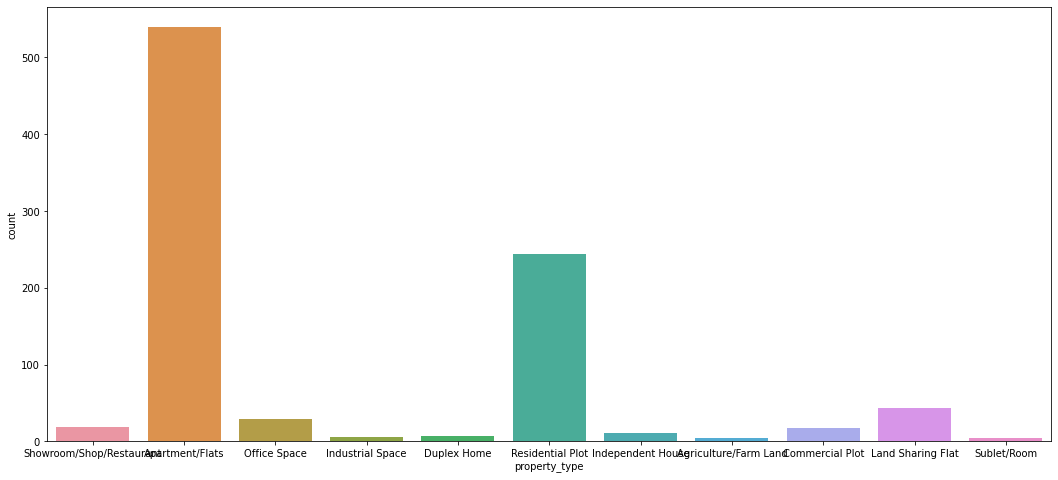

In [514]:
plt.figure(figsize = (18,8))
sns.countplot(x = "property_type",data = df_fin)

<AxesSubplot:xlabel='purpose', ylabel='count'>

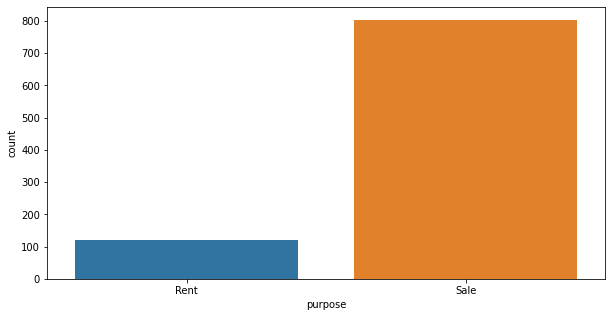

In [515]:
plt.figure(figsize = (10,5))
sns.countplot(x = "purpose",data = df_fin)

In [516]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amenities      858 non-null    object 
 1   area           923 non-null    object 
 2   balconies      628 non-null    object 
 3   baths          605 non-null    float64
 4   bedroom        605 non-null    float64
 5   location       923 non-null    object 
 6   price          492 non-null    object 
 7   property_type  923 non-null    object 
 8   property_url   923 non-null    object 
 9   purpose        923 non-null    object 
dtypes: float64(2), object(8)
memory usage: 72.2+ KB


# Cleaning bdhousing


## Column : Area


In [517]:
df_fin["area"].value_counts()

3 Katha      138
5 Katha       73
1200 sqft     24
1350 sqft     22
1600 sqft     21
            ... 
6152 sqft      1
1770 sqft      1
300 Katha      1
400 sqft       1
360 sqft       1
Name: area, Length: 342, dtype: int64

In [518]:
len(df_fin["area"])

923

In [519]:
 df.loc[62,["area"]] , df_fin.loc[62,["area"]]

(area    3 Katha
 Name: 62, dtype: object,
 area    3 Katha
 Name: 62, dtype: object)

In [520]:
3  * 720

2160

In [521]:
# converting katha to sqft
for index,row in enumerate(df_fin["area"]):
    if "Katha" in row:
        tot_area = float(row[0]) * 720
        df_fin.loc[index,["area"]] = tot_area
df_fin["area"]

0      3600 sqft
1       880 sqft
2      1553 sqft
3      4600 sqft
4      1200 sqft
         ...    
918     360 sqft
919     800 sqft
920    2100 sqft
921    1175 sqft
922    2197 sqft
Name: area, Length: 923, dtype: object

In [522]:
 #df_fin["area"][131]  , str(df_fin["area"][131]).split(" ")[0]

In [523]:
# stripping "sqft" from area column and converting to float
df_fin["area"] = df_fin["area"].apply(lambda x: str(x).split(" ")[0])
df_fin["area"] = df_fin["area"].astype(float)

In [524]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amenities      858 non-null    object 
 1   area           923 non-null    float64
 2   balconies      628 non-null    object 
 3   baths          605 non-null    float64
 4   bedroom        605 non-null    float64
 5   location       923 non-null    object 
 6   price          492 non-null    object 
 7   property_type  923 non-null    object 
 8   property_url   923 non-null    object 
 9   purpose        923 non-null    object 
dtypes: float64(3), object(7)
memory usage: 72.2+ KB


## Column : price

In [525]:
len(df_fin["price"].unique())

290

In [526]:
df_fin["price"].unique()

array(['468000', '30000', '414000', '2500', '2 Mont', '13000', '25000',
       '18000', '16000', '60000', '32000', '37000', '1.02 Cr.',
       '63.20 Lac', nan, '1.10 Cr.', '15000', '43000', '40000', '70000',
       '40.50 Lac', '2.76 Cr.', '76.25 Lac', '38000', '1.21 Cr.', '16500',
       '176000', '75000', '17000', '59.24 Lac', '22000', '323000',
       '36000', '23000', '35000', '297500', '5000', '120000', '49.00 Lac',
       '45000', '0', '1.71 Cr.', '20.00 Lac', '300000', '12000', '65000',
       '20000', '11000', '90000', '10000', '260000', '75.00 Lac',
       '2 Month Deposit + 1st Mo. Ren', '67.00 Lac', '99.75 Lac',
       '13.00 Lac', '74.80 Lac', '4.15 Cr.', '1.50 Cr.', '62.17 Lac',
       '24.00 Lac', '1.00 Cr.', '2.08 Cr.', '1.90 Cr.', '38.88 Lac',
       '41.25 Lac', '30.00 Lac', '88.35 Lac', '95.00 Lac', '46.74 Lac',
       '46.80 Lac', '90.00 Lac', '64.75 Lac', '160.00 Cr.', '80',
       '15.00 Lac', '12.50 Lac', '38.00 Lac', '3.21 Cr.', '70.00 Lac',
       '1.15 Cr.', '

In [527]:
# 
for index,i in df_fin.iterrows():
    
    if  df_fin.loc[index,"price"] is not np.nan and "Lac" in df_fin.loc[index,"price"]:
        sp = df_fin.loc[index,"price"].split(" ")[0]
        val = float(sp) * 100000
        df_fin.loc[index,["price"]] = val
    elif df_fin.loc[index,"price"] is not np.nan and "Cr" in df_fin.loc[index,"price"]:
        sp = df_fin.loc[index,"price"].split(" ")[0]
        val = float(sp) * 10000000
        df_fin.loc[index,["price"]] = val


In [528]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amenities      858 non-null    object 
 1   area           923 non-null    float64
 2   balconies      628 non-null    object 
 3   baths          605 non-null    float64
 4   bedroom        605 non-null    float64
 5   location       923 non-null    object 
 6   price          492 non-null    object 
 7   property_type  923 non-null    object 
 8   property_url   923 non-null    object 
 9   purpose        923 non-null    object 
dtypes: float64(3), object(7)
memory usage: 72.2+ KB


In [529]:
df_fin["price"].unique()

array(['468000', '30000', '414000', '2500', '2 Mont', '13000', '25000',
       '18000', '16000', '60000', '32000', '37000', 10200000.0, 6320000.0,
       nan, 11000000.0, '15000', '43000', '40000', '70000', 4050000.0,
       27599999.999999996, 7625000.0, '38000', 12100000.0, '16500',
       '176000', '75000', '17000', 5924000.0, '22000', '323000', '36000',
       '23000', '35000', '297500', '5000', '120000', 4900000.0, '45000',
       '0', 17100000.0, 2000000.0, '300000', '12000', '65000', '20000',
       '11000', '90000', '10000', '260000', 7500000.0,
       '2 Month Deposit + 1st Mo. Ren', 6700000.0, 9975000.0, 1300000.0,
       7480000.0, 41500000.0, 15000000.0, 6217000.0, 2400000.0,
       10000000.0, 20800000.0, 19000000.0, 3888000.0000000005, 4125000.0,
       3000000.0, 8835000.0, 9500000.0, 4674000.0, 4680000.0, 9000000.0,
       6475000.0, 1600000000.0, '80', 1500000.0, 1250000.0, 3800000.0,
       32100000.0, 7000000.0, 11500000.0, 4200000.0, 9625000.0, 1000000.0,
       665

In [530]:
# replacing non integer values with NaN values and dropping all null NaN values
df_fin.replace(["2 Months Rent","2 Month Deposit + 1st Mo. Ren","2 Mont"],np.nan,inplace = True)
df_fin.dropna(subset = ["price"],inplace = True)

In [531]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 919
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amenities      461 non-null    object 
 1   area           489 non-null    float64
 2   balconies      303 non-null    object 
 3   baths          270 non-null    float64
 4   bedroom        270 non-null    float64
 5   location       489 non-null    object 
 6   price          489 non-null    object 
 7   property_type  489 non-null    object 
 8   property_url   489 non-null    object 
 9   purpose        489 non-null    object 
dtypes: float64(3), object(7)
memory usage: 42.0+ KB


In [532]:
df_fin

,amenities,area,balconies,baths,bedroom,location,price,property_type,property_url,purpose
0,NaN,3600.0,No balcony,NaN,NaN,"Banasree , Dhaka",468000,Showroom/Shop/Restaurant,https://www.bdhousing.com/details/245564/3600-...,Rent
1,"Security,Lift,Fire exit,Self Water supply,Cyli...",880.0,No balcony,NaN,NaN,"Uttara , Dhaka",30000,Showroom/Shop/Restaurant,https://www.bdhousing.com/details/242728/880-s...,Rent
2,"Mosque/Prayer Room,Security,Lift,Fire exit,WAS...",1553.0,2,3.0,3.0,"Mirpur 13 , Dhaka",30000,Apartment/Flats,https://www.bdhousing.com/details/245539/1553-...,Rent
3,"Security,Lift,WASA connection,Self Water suppl...",4600.0,No balcony,NaN,NaN,"Badda , Dhaka",414000,Office Space,https://www.bdhousing.com/details/241170/9000-...,Rent
4,"Security,Lift,Fire exit,WASA connection,Self W...",1200.0,3,3.0,3.0,"Shyamoli , Dhaka",2500,Apartment/Flats,https://www.bdhousing.com/details/244754/1200-...,Rent
...,...,...,...,...,...,...,...,...,...,...
913,"Mosque/Prayer Room,Security,Lift,Fire exit,WAS...",1575.0,3,4.0,3.0,"Mirpur 1 , Dhaka",30000,Apartment/Flats,https://www.bdhousing.com/details/245794/1575-...,Rent
914,"Mosque/Prayer Room,Security,Lift,Fire exit,WAS...",2100.0,2,3.0,3.0,"Banasree , Dhaka",38000,Apartment/Flats,https://www.bdhousing.com/details/245468/2100-...,Rent
916,"Mosque/Prayer Room,Security,Lift,Fire exit,WAS...",1400.0,3,3.0,3.0,"Uttara , Dhaka",23000,Apartment/Flats,https://www.bdhousing.com/details/243987/1400-...,Rent
918,NaN,360.0,No balcony,NaN,NaN,"Banasree , Dhaka",55000,Showroom/Shop/Restaurant,https://www.bdhousing.com/details/244139/360-s...,Rent


In [533]:
# converting object datatype to float
df_fin["price"][664] = df_fin["price"][664].replace(",","")
df_fin["price"] = df_fin["price"].astype("float")

C:\Users\Mohamed Adnan\AppData\Local\Temp\ipykernel_12108\956126209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin["price"][664] = df_fin["price"][664].replace(",","")


In [534]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 919
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amenities      461 non-null    object 
 1   area           489 non-null    float64
 2   balconies      303 non-null    object 
 3   baths          270 non-null    float64
 4   bedroom        270 non-null    float64
 5   location       489 non-null    object 
 6   price          489 non-null    float64
 7   property_type  489 non-null    object 
 8   property_url   489 non-null    object 
 9   purpose        489 non-null    object 
dtypes: float64(4), object(6)
memory usage: 58.2+ KB


## Column : building_type

In [535]:
np.where(df_fin["property_type"] == "Apartment/Flats")

(array([  2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  21,  22,  23,  24,  26,  27,  28,  30,  31,  32,
         33,  34,  35,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,
         49,  55,  56,  57,  58,  59,  60,  62,  63,  64,  66,  67,  71,
         72,  73,  75,  76,  77,  79,  80,  81,  83,  84,  85,  86,  87,
         88,  91,  93,  94,  95,  96,  97, 102, 110, 111, 112, 114, 119,
        122, 126, 127, 129, 131, 132, 133, 139, 140, 141, 142, 143, 145,
        146, 149, 150, 152, 153, 155, 157, 158, 159, 161, 162, 164, 169,
        171, 172, 174, 176, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        189, 191, 193, 195, 196, 199, 200, 201, 203, 204, 209, 211, 213,
        215, 216, 218, 219, 220, 222, 223, 226, 229, 232, 234, 235, 237,
        238, 240, 241, 242, 243, 244, 246, 249, 250, 252, 253, 256, 259,
        260, 262, 264, 265, 266, 273, 274, 275, 277, 283, 284, 289, 290,
        295, 301, 304, 309, 325, 326, 327, 329, 331

In [536]:
df_fin["property_type"].unique()

array(['Showroom/Shop/Restaurant', 'Apartment/Flats', 'Office Space',
       'Industrial Space', 'Residential Plot', 'Independent House',
       'Commercial Plot', 'Land Sharing Flat', 'Agriculture/Farm Land',
       'Duplex Home', 'Sublet/Room'], dtype=object)

In [537]:
df_fin["property_type"].value_counts()

Apartment/Flats             233
Residential Plot            164
Office Space                 24
Land Sharing Flat            24
Showroom/Shop/Restaurant     16
Commercial Plot               8
Independent House             7
Industrial Space              6
Sublet/Room                   4
Duplex Home                   2
Agriculture/Farm Land         1
Name: property_type, dtype: int64

In [538]:
# updating values to "residential" and "commercial" respectively
for index,i in df_fin.iterrows():
    
    if   df_fin.loc[index,["property_type"]][0] in ['Apartment/Flats','Duplex Home', 'Residential Plot','Independent House',"Sublet/Room","Land Sharing Flat"]:
        df_fin.loc[index,["property_type"]] = "Residential"
    elif  df_fin.loc[index,["property_type"]][0] in ['Showroom/Shop/Restaurant','Office Space','Industrial Space','Agriculture/Farm Land', 'Commercial Plot']:
        df_fin.loc[index,["property_type"]] = "Commercial"
    
        
        

In [539]:
 df_fin.loc[1,["property_type"]]

property_type    Commercial
Name: 1, dtype: object

In [540]:
df_fin["property_type"].unique()

array(['Commercial', 'Residential'], dtype=object)

In [541]:
df_fin["property_type"].value_counts()

Residential    434
Commercial      55
Name: property_type, dtype: int64

<AxesSubplot:xlabel='property_type', ylabel='count'>

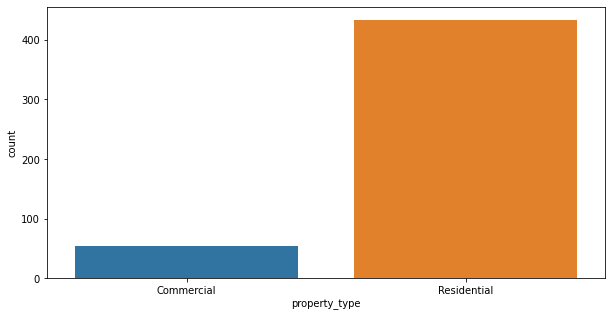

In [542]:
plt.figure(figsize = (10,5))
sns.countplot(x = "property_type",data = df_fin)

In [543]:
df_fin.rename(columns = {"property_type":"building_type"},inplace = True)

In [544]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 919
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amenities      461 non-null    object 
 1   area           489 non-null    float64
 2   balconies      303 non-null    object 
 3   baths          270 non-null    float64
 4   bedroom        270 non-null    float64
 5   location       489 non-null    object 
 6   price          489 non-null    float64
 7   building_type  489 non-null    object 
 8   property_url   489 non-null    object 
 9   purpose        489 non-null    object 
dtypes: float64(4), object(6)
memory usage: 58.2+ KB


## Column : location (address,locality,city)

In [545]:
# spliting the location into address,city,area and creating new Series "address"
address = df_fin["location"].apply(get_detailed_address).apply(pd.Series)
address

,City,Area,Address
0,Dhaka,Banasree,
1,Dhaka,Uttara,
2,Dhaka,,Mirpur 13
3,Dhaka,Badda,
4,Dhaka,Shyamoli,
...,...,...,...
913,Dhaka,,Mirpur 1
914,Dhaka,Banasree,
916,Dhaka,Uttara,
918,Dhaka,Banasree,


In [546]:
# concatenating dataframe with address series
df_fin = pd.concat([df_fin,address],axis = 1)

In [547]:
df_fin.head(5) 

,amenities,area,balconies,baths,bedroom,location,price,building_type,property_url,purpose,City,Area,Address
0,NaN,3600.0,No balcony,NaN,NaN,"Banasree , Dhaka",468000.0,Commercial,https://www.bdhousing.com/details/245564/3600-...,Rent,Dhaka,Banasree,
1,"Security,Lift,Fire exit,Self Water supply,Cyli...",880.0,No balcony,NaN,NaN,"Uttara , Dhaka",30000.0,Commercial,https://www.bdhousing.com/details/242728/880-s...,Rent,Dhaka,Uttara,
2,"Mosque/Prayer Room,Security,Lift,Fire exit,WAS...",1553.0,2,3.0,3.0,"Mirpur 13 , Dhaka",30000.0,Residential,https://www.bdhousing.com/details/245539/1553-...,Rent,Dhaka,,Mirpur 13
3,"Security,Lift,WASA connection,Self Water suppl...",4600.0,No balcony,NaN,NaN,"Badda , Dhaka",414000.0,Commercial,https://www.bdhousing.com/details/241170/9000-...,Rent,Dhaka,Badda,
4,"Security,Lift,Fire exit,WASA connection,Self W...",1200.0,3,3.0,3.0,"Shyamoli , Dhaka",2500.0,Residential,https://www.bdhousing.com/details/244754/1200-...,Rent,Dhaka,Shyamoli,


In [548]:
df_fin.shape

(489, 13)

In [549]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 919
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amenities      461 non-null    object 
 1   area           489 non-null    float64
 2   balconies      303 non-null    object 
 3   baths          270 non-null    float64
 4   bedroom        270 non-null    float64
 5   location       489 non-null    object 
 6   price          489 non-null    float64
 7   building_type  489 non-null    object 
 8   property_url   489 non-null    object 
 9   purpose        489 non-null    object 
 10  City           489 non-null    object 
 11  Area           489 non-null    object 
 12  Address        489 non-null    object 
dtypes: float64(4), object(9)
memory usage: 69.6+ KB


## Amenities

In [550]:
# filling the empty NaN values with string "null"
df_fin["amenities"].fillna("null",inplace = True)

In [551]:
# creating a dictionary to append all the available amenities mentioned from the dataset
amenities = set()
for i in df_fin["amenities"]:
    
        amenities.update(i.split(","))
amenities

{'Banks',
 'Bazaar',
 'CCTV',
 'Civil Defense',
 'College',
 'Cylinder Gas',
 'Eid congregation place',
 'Electricity',
 'Electronic security',
 'Fire Protection',
 'Fire Services',
 'Fire exit',
 'Garden',
 'Gas',
 'Gas Connection',
 'Generator',
 'Graveyard',
 'Guest Parking',
 'Gymnasium',
 'Hospital',
 'Hot water and heating',
 'Inter com',
 'Lakes',
 'Lift',
 'Mosque',
 'Mosque/Prayer Room',
 'Parks',
 'Play Ground',
 'Police Box',
 'Pool',
 'Post Office',
 'Satellite or cable TV',
 'School',
 'Security',
 'Security Alarm System',
 'Self Water supply',
 'Servent Room',
 'Servent Toilet',
 'Solar panels',
 'Telephone line',
 'Universities',
 'WASA connection',
 'Water Supply',
 'Wi-Fi connectivity',
 'null'}

In [552]:
# mapping yes and no values on each of the attribute's amenity from the dictionary "amenities"
for amenity in amenities:
    df_fin[f"{amenity.strip()}-amenity"] = df_fin['amenities'].str.contains(amenity).map({True: 'Yes', False: 'No'})

In [553]:
df_fin.head(5)

,amenities,area,balconies,baths,bedroom,location,price,building_type,property_url,purpose,...,Banks-amenity,Fire exit-amenity,Security-amenity,Pool-amenity,Universities-amenity,Graveyard-amenity,Mosque/Prayer Room-amenity,Satellite or cable TV-amenity,School-amenity,Guest Parking-amenity
0,null,3600.0,No balcony,NaN,NaN,"Banasree , Dhaka",468000.0,Commercial,https://www.bdhousing.com/details/245564/3600-...,Rent,...,No,No,No,No,No,No,No,No,No,No
1,"Security,Lift,Fire exit,Self Water supply,Cyli...",880.0,No balcony,NaN,NaN,"Uttara , Dhaka",30000.0,Commercial,https://www.bdhousing.com/details/242728/880-s...,Rent,...,No,Yes,Yes,No,No,No,No,No,No,No
2,"Mosque/Prayer Room,Security,Lift,Fire exit,WAS...",1553.0,2,3.0,3.0,"Mirpur 13 , Dhaka",30000.0,Residential,https://www.bdhousing.com/details/245539/1553-...,Rent,...,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes
3,"Security,Lift,WASA connection,Self Water suppl...",4600.0,No balcony,NaN,NaN,"Badda , Dhaka",414000.0,Commercial,https://www.bdhousing.com/details/241170/9000-...,Rent,...,No,No,Yes,No,No,No,No,No,No,No
4,"Security,Lift,Fire exit,WASA connection,Self W...",1200.0,3,3.0,3.0,"Shyamoli , Dhaka",2500.0,Residential,https://www.bdhousing.com/details/244754/1200-...,Rent,...,No,Yes,Yes,Yes,No,No,No,No,No,No


In [554]:
df_fin.drop(["amenities"],axis = 1,inplace = True)

In [555]:
df_fin.head(5).T

,0,1,2,3,4
area,3600.0,880.0,1553.0,4600.0,1200.0
balconies,No balcony,No balcony,2,No balcony,3
baths,NaN,NaN,3.0,NaN,3.0
bedroom,NaN,NaN,3.0,NaN,3.0
location,"Banasree , Dhaka","Uttara , Dhaka","Mirpur 13 , Dhaka","Badda , Dhaka","Shyamoli , Dhaka"
price,468000.0,30000.0,30000.0,414000.0,2500.0
building_type,Commercial,Commercial,Residential,Commercial,Residential
property_url,https://www.bdhousing.com/details/245564/3600-...,https://www.bdhousing.com/details/242728/880-s...,https://www.bdhousing.com/details/245539/1553-...,https://www.bdhousing.com/details/241170/9000-...,https://www.bdhousing.com/details/244754/1200-...
purpose,Rent,Rent,Rent,Rent,Rent
City,Dhaka,Dhaka,Dhaka,Dhaka,Dhaka


In [556]:
df_fin.shape

(489, 57)

In [557]:
df_fin.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 919
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area                            489 non-null    float64
 1   balconies                       303 non-null    object 
 2   baths                           270 non-null    float64
 3   bedroom                         270 non-null    float64
 4   location                        489 non-null    object 
 5   price                           489 non-null    float64
 6   building_type                   489 non-null    object 
 7   property_url                    489 non-null    object 
 8   purpose                         489 non-null    object 
 9   City                            489 non-null    object 
 10  Area                            489 non-null    object 
 11  Address                         489 non-null    object 
 12  Hot water and heating-amenity   489 

## Columns : bedroom , bathrooms and balconies -amenity

In [558]:
# filling the NaN values with 0 and checking if null values are present
df_fin["bedroom"].fillna(0,inplace = True)
df_fin["baths"].fillna(0,inplace = True)


df_fin["bedroom"].isnull().sum(), df_fin["baths"].isnull().sum()

(0, 0)

In [559]:
df_fin["bedroom"].unique() ,df_fin["baths"].unique() , df_fin["balconies"].unique() 

(array([0., 3., 2., 4., 6., 5., 1.]),
 array([0., 3., 2., 4., 6., 1., 5.]),
 array(['No balcony', '2', '3', '4', '1', nan, '6', '5', 'Attach'],
       dtype=object))

In [560]:
# replacing non integer vales with nan values
df_fin["balconies"] = df_fin["balconies"].replace(["Attach","No balcony"],np.nan)
df_fin["balconies"].fillna(0,inplace = True)
df_fin["balconies"] = df_fin["balconies"].astype("float")


In [561]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 919
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area                            489 non-null    float64
 1   balconies                       489 non-null    float64
 2   baths                           489 non-null    float64
 3   bedroom                         489 non-null    float64
 4   location                        489 non-null    object 
 5   price                           489 non-null    float64
 6   building_type                   489 non-null    object 
 7   property_url                    489 non-null    object 
 8   purpose                         489 non-null    object 
 9   City                            489 non-null    object 
 10  Area                            489 non-null    object 
 11  Address                         489 non-null    object 
 12  Hot water and heating-amenity   489 

In [562]:
# renaming respective columns
df_fin.rename(columns = {"balconies":"balconies -amenity"},inplace = True)
df_fin.rename(columns = {"baths":"num_bath_rooms"},inplace = True)
df_fin.rename(columns = {"bedroom":"num_bed_rooms"},inplace = True)

In [563]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 919
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area                            489 non-null    float64
 1   balconies -amenity              489 non-null    float64
 2   num_bath_rooms                  489 non-null    float64
 3   num_bed_rooms                   489 non-null    float64
 4   location                        489 non-null    object 
 5   price                           489 non-null    float64
 6   building_type                   489 non-null    object 
 7   property_url                    489 non-null    object 
 8   purpose                         489 non-null    object 
 9   City                            489 non-null    object 
 10  Area                            489 non-null    object 
 11  Address                         489 non-null    object 
 12  Hot water and heating-amenity   489 

In [564]:
df_fin

,area,balconies -amenity,num_bath_rooms,num_bed_rooms,location,price,building_type,property_url,purpose,City,...,Banks-amenity,Fire exit-amenity,Security-amenity,Pool-amenity,Universities-amenity,Graveyard-amenity,Mosque/Prayer Room-amenity,Satellite or cable TV-amenity,School-amenity,Guest Parking-amenity
0,3600.0,0.0,0.0,0.0,"Banasree , Dhaka",468000.0,Commercial,https://www.bdhousing.com/details/245564/3600-...,Rent,Dhaka,...,No,No,No,No,No,No,No,No,No,No
1,880.0,0.0,0.0,0.0,"Uttara , Dhaka",30000.0,Commercial,https://www.bdhousing.com/details/242728/880-s...,Rent,Dhaka,...,No,Yes,Yes,No,No,No,No,No,No,No
2,1553.0,2.0,3.0,3.0,"Mirpur 13 , Dhaka",30000.0,Residential,https://www.bdhousing.com/details/245539/1553-...,Rent,Dhaka,...,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes
3,4600.0,0.0,0.0,0.0,"Badda , Dhaka",414000.0,Commercial,https://www.bdhousing.com/details/241170/9000-...,Rent,Dhaka,...,No,No,Yes,No,No,No,No,No,No,No
4,1200.0,3.0,3.0,3.0,"Shyamoli , Dhaka",2500.0,Residential,https://www.bdhousing.com/details/244754/1200-...,Rent,Dhaka,...,No,Yes,Yes,Yes,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1575.0,3.0,4.0,3.0,"Mirpur 1 , Dhaka",30000.0,Residential,https://www.bdhousing.com/details/245794/1575-...,Rent,Dhaka,...,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes
914,2100.0,2.0,3.0,3.0,"Banasree , Dhaka",38000.0,Residential,https://www.bdhousing.com/details/245468/2100-...,Rent,Dhaka,...,No,Yes,Yes,No,No,No,Yes,No,No,Yes
916,1400.0,3.0,3.0,3.0,"Uttara , Dhaka",23000.0,Residential,https://www.bdhousing.com/details/243987/1400-...,Rent,Dhaka,...,No,Yes,Yes,No,No,No,Yes,Yes,No,No
918,360.0,0.0,0.0,0.0,"Banasree , Dhaka",55000.0,Commercial,https://www.bdhousing.com/details/244139/360-s...,Rent,Dhaka,...,No,No,No,No,No,No,No,No,No,No


In [565]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 919
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area                            489 non-null    float64
 1   balconies -amenity              489 non-null    float64
 2   num_bath_rooms                  489 non-null    float64
 3   num_bed_rooms                   489 non-null    float64
 4   location                        489 non-null    object 
 5   price                           489 non-null    float64
 6   building_type                   489 non-null    object 
 7   property_url                    489 non-null    object 
 8   purpose                         489 non-null    object 
 9   City                            489 non-null    object 
 10  Area                            489 non-null    object 
 11  Address                         489 non-null    object 
 12  Hot water and heating-amenity   489 

In [566]:
df_fin.to_csv("cleaned_bdhousing.csv",index = False)